<a href="https://colab.research.google.com/github/mario-rot/ComputerVisionCourse-MAI/blob/main/Session%201/introduction_to_skimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Image 

This tutorial serves as an **Introduction to Image Processing using Python**. There are several Image Processing Libraries in the Python ecosystem. Some of the popular ones include OpenCV (Open Source Computer Vision), Scikit-Image and PIL (Python Imaging Library). In this course, we would extensively use the functions that are provided with **Scikit-Image Library**.

---

**Scikit-Image** (in short skimage) is a community driven Imaging Library built on top of scipy.ndimage and it provides different routines for various image processing tasks in Python.

---

# Importing skimage

skimage is available by default in Colab notebooks. Therefore the library can be invoked directly using the *import* statement

*PS: Follow the instructions on the [Installation section](https://scikit-image.org/docs/stable/install.html) of Scikit-Image to make local installations.*


In [ ]:
import skimage
print(skimage.__version__)

0.19.2


# Common Submodules

Most of the routines (functions) are grouped under the different submodules of skimage. 

Standard test images are part of the **data** submodule. These images can be directly accessed using function calls.

In [ ]:
from skimage import data
camera_image = data.camera()

# What is an Image?

Image is nothing but a **n-dimensional array** of numbers. Each element in the array corresponds to a **pixel**. The row (r) and column (c) corresponds to the **image size** and every r x c plane corresponds to an **image channel**. 

Mostly images are used as:

*   **Grayscale Images:** 2D image (r x c) where each pixel corresponds to the intensity.
*   **Color Images (RGB Images):** 2D multi-channel images where the channels correspond to the Red, Green and Blue channels.


# Image Properties

As mentioned above, the images are stored as numpy arrays in skimage. All the possible numpy operations are possible on the image data.

**Exercise #01:**

*   Print the type of the sample image loaded previously
*   Print the shape and size of the image
*   Print the number of channles of the loaded image



In [ ]:
# solution
{'Data Type: ':camera_image.dtype, 'Image Type: ':type(camera_image), 'Shape: ':camera_image.shape, 'Size: ':camera_image.size, 'Channels: ':1 if len(camera_image.shape) == 2 else camera_image.shape[-1]}

{'Data Type: ': dtype('uint8'),
 'Image Type: ': numpy.ndarray,
 'Shape: ': (512, 512),
 'Size: ': 262144,
 'Channels: ': 1}

# Image Visualization
Viewing manipulated images is an import part of any image processing tool. skimage provides key visualization through different tools available in the Python ecosystem.

For all the experiments in this course, we would use the functions provided by **Matplotlib** library.

Read **[usage](https://matplotlib.org/stable/tutorials/introductory/usage.html)** section to get an introduction to different matplotlib functions. 

Get familiar with plots, subplots, setting titles, legends, labels, etc. Also look at the common charts that can be used to understand differnet problems.

In [ ]:
import matplotlib.pyplot as plt

Images are viewed using the **imshow** function available in the pyplot submodule.

**Exercise #02:**

*   Visualize the camera image using **imshow**
*   Change the axis title of the plot as 'camera'



Text(0.5, 1.0, 'Camera')

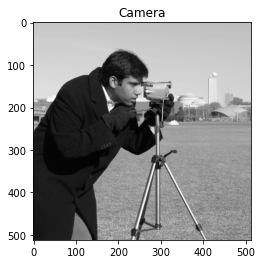

In [ ]:
# solution
plt.imshow(camera_image, cmap='gray')
plt.title('Camera')

**Exercise #03:**


*   Understand the parameters of imshow of pyplot
*   Visualize the loaded image as grayscale image



Text(0.5, 1.0, 'Camera')

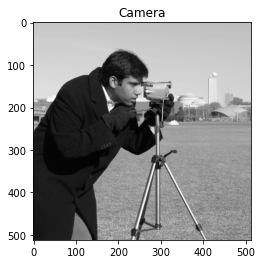

In [ ]:
# solution
plt.imshow(camera_image, cmap='gray')
plt.title('Camera')

### A short tutorial on working with images using Matplotlib is available [here](https://matplotlib.org/stable/tutorials/introductory/images.html) !!!!

### Read [**origin and extend**](https://matplotlib.org/stable/tutorials/intermediate/imshow_extent.html) in imshow to understand the orientations of images in the matplotlib rendering.

# Reading and Writing Images

It is also possible to load images from external sources and also save the manipulated images in different formats. All the supported functions are available in the **io** submodule. 

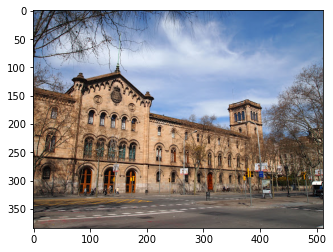

In [ ]:
from skimage import io
test_image = io.imread('images/ub.jpg')  # replace with the URL from your drive location
plt.imshow(test_image)
plt.show()

Similarly, images can be saved in different formats using the imsave function.

**Exercise #04:**

*   Create a numpy array of size 256 x 256 x 3 which will hold all the color **white** in all pixels
*   Save the created array as a jpg image in the images folder using **imsave** function. 
*   *Remember to use the correct file path corresponding to the G-drive.*



C:\Users\mario\AppData\Local\Temp\ipykernel_10560\2891643431.py:4: UserWarning: images/white.jpg is a low contrast image
  io.imsave('images/white.jpg', img)


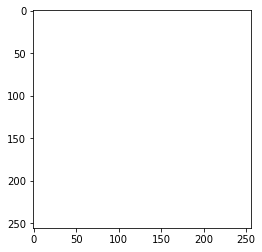

In [ ]:
# solution
import numpy as np
img = np.moveaxis(np.array([[[255]*256]*256]*3),0,-1)
io.imsave('images/white.jpg', img)
plt.imshow(img)

# Image Coordinates
Grayscale images are indexed as r x c where (0,0) corresponds to the top left corner of the image. Please note that this is different from the normal Cartesian Coordinates (x,y).

Read the documentation on **[Numpy for Images crash course](https://scikit-image.org/docs/dev/user_guide/numpy_images.html)** for complete information about standard image manipulations.

# Image Types
In skimage, all images are stored as numpy arrays and supports various data types based on the value of the pixels. 

Refer to **[Image Data Types](https://scikit-image.org/docs/dev/user_guide/data_types.html)** for complete information about the Input and Output data types used in image manipulations.

**Exercise #05:**

*   What is the difference between using **skimage.utils.img_as_float** and **np.astype(np.float)**? Why does skimage has its own type conversion function although images are represented as numpy arrays?*italicized text*

**Solution**

*The main diference between both methods is that skimage conversion also clip the data to another range of values, while numpy conversion just apply the dtype change but preserve the quantities as they are.*

- ***skimage.utils.img_as_float:** The range of a floating point image is [0.0, 1.0] or [-1.0, 1.0] when converting from unsigned or signed datatypes, respectively. If the input image has a float type, intensity values are not modified and can be outside the ranges [0.0, 1.0] or [-1.0, 1.0].*
- ***np.astype:** Copy of the array, cast to a specified type.*

...

# Image Transforms

There are several image manipulation utilities such as type conversions available in the **utils** submodule. Another common submodule is the **transform** submodule. The functions available in transform submodule is used to change the spatial and photometric resolution of an image in various scenarios.

Commonly used transforms are resizing the images and rotating the images.


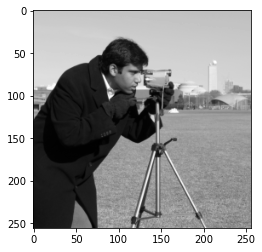

(256, 256) 0.008465512696419247 0.9994933599059728


In [ ]:
# Resize the camera image to 256 x 256
from skimage.transform import resize
camera_image_resize = resize(camera_image, (256, 256))
plt.imshow(camera_image_resize, cmap='gray')
plt.show()
print(camera_image_resize.shape, camera_image_resize.min(), camera_image_resize.max()) 

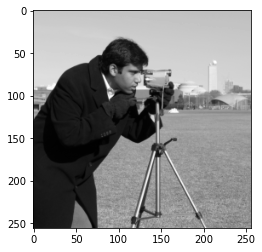

(256, 256) 0.008465512696419247 0.9994933599059728


In [ ]:
# Rescale the camera image by a factor of 0.5
from skimage.transform import rescale
camera_image_rescale = rescale(camera_image, 0.5)
plt.imshow(camera_image_rescale, cmap='gray')
plt.show()
print(camera_image_rescale.shape, camera_image_rescale.min(), camera_image_rescale.max())

**Exercise #06:**

*   What is the difference between resize and rescale functions?
*   What happens with preserve_range parameter in both the functions?

**Solution**

- *The main difference between the fuctions is that, in **rescale** function you provide a a factor for rescaling, while in **resize** you provide the specific dimensions of the output image. Nevertheless, but perform an interpolation operation to increase or decrease the size of the original image.*
- *The **preserve_range** allows to keep the original range of values of the image. Otherwise, the input image is converted according to of 'img_as_float' fuction*
...

*   Rescale the image by a factor of 0.5 with preserve_range parameter enabled and observe the difference.

(256, 256) 2.1587057375869083 254.87080677602304


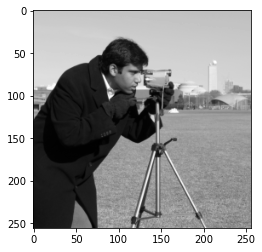

In [ ]:
# solution
camera_image_rescale_preserve = rescale(camera_image, 0.5, preserve_range=True)
plt.imshow(camera_image_rescale_preserve, cmap='gray')
print(camera_image_rescale_preserve.shape, camera_image_rescale_preserve.min(), camera_image_rescale_preserve.max())

# Manipulating intensity values
What happens when we change the pixel values of the image?

Execute the following outputs and observe the difference.

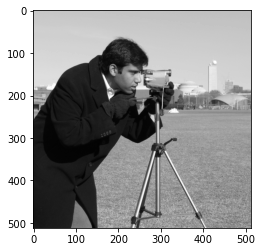

(512, 512) 0 255


In [ ]:
plt.imshow(camera_image, cmap='gray')
plt.show()
print(camera_image.shape, camera_image.min(), camera_image.max()) 

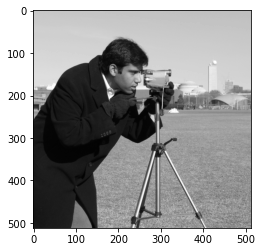

(512, 512) 0.0 127.5


In [ ]:
camera_image_2 = camera_image/2  # reducing the intensity by 2
plt.imshow(camera_image_2, cmap='gray')
plt.show()
print(camera_image_2.shape, camera_image_2.min(), camera_image_2.max()) 

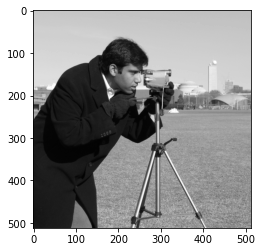

(512, 512) 0.0 63.75


In [ ]:
camera_image_3 = camera_image/4  # reducing the intensity by 4
plt.imshow(camera_image_3, cmap='gray')
plt.show()
print(camera_image_3.shape, camera_image_3.min(), camera_image_3.max()) 

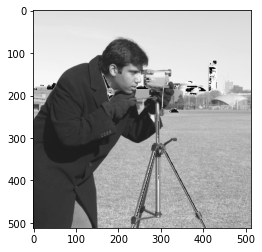

(512, 512) 0 255


In [ ]:
camera_image_4 = camera_image + 25  # shifting intensity by +25
plt.imshow(camera_image_4, cmap='gray')
plt.show()
print(camera_image_4.shape, camera_image_4.min(), camera_image_4.max()) 

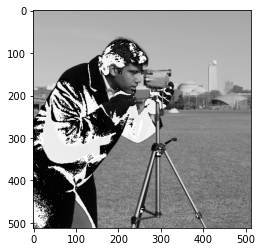

(512, 512) 0 255


In [ ]:
camera_image_5 = camera_image - 25  # shifting intensity by -25
plt.imshow(camera_image_5, cmap='gray')
plt.show()
print(camera_image_5.shape, camera_image_5.min(), camera_image_5.max())

**Exercise #07:**

*   What difference do you observe with the above four operations? How does the change of intensity affect the picture?



In [ ]:
camera_image[320:350,50:150]

array([[ 4,  4,  7, ...,  5,  4,  4],
       [ 6,  6,  5, ...,  5,  5,  4],
       [ 6,  6,  4, ...,  4,  4,  4],
       ...,
       [ 5,  5,  6, ..., 18, 16, 15],
       [ 5,  5,  5, ..., 15, 12, 10],
       [ 6,  6,  5, ..., 10,  9,  8]], dtype=uint8)

In [ ]:
camera_image_5[320:350,50:150]

array([[235, 235, 238, ..., 236, 235, 235],
       [237, 237, 236, ..., 236, 236, 235],
       [237, 237, 235, ..., 235, 235, 235],
       ...,
       [236, 236, 237, ..., 249, 247, 246],
       [236, 236, 236, ..., 246, 243, 241],
       [237, 237, 236, ..., 241, 240, 239]], dtype=uint8)

**Solution**

*When values of the image are reduced eiter by substracting or dividing it seems like it should be darker, kind of like less illuminated. In contrast, when you increase the values of the pixels in the image you should get a more illuminated image, as values approximate more to the maximum (white). In this specific case I think the changes are not so visible because matplotlib **imshow** fuction clips the data between 0 and 1 to plot the image, so that preserves the intensities when you make the plot. At the last test, when we substract 25 to the pixels values, it seems to be happening the contrary action to the logical thinking, this is because the dark pixels with values less than 25 instead to change to negative numbers they restart from the top possible value for the Images in RGB color space (255) so they become tend-to white pixels.*

...

**Exercise #08:**

*   Resize the camera_man image to (64, 64)
*   Plot the resized image using matplotlib (in the same scale as the image)
*   Plot the resized image using matplotlib (view the image as 256 x 256)
*   What do you observe between both the plots?



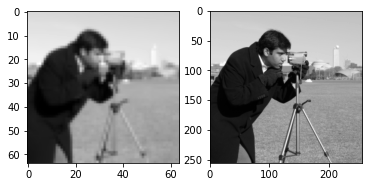

In [ ]:
# solution
fig,axs = plt.subplots(1,2)
camera_image_64 = resize(camera_image, (64,64))
axs[0].imshow(camera_image_64, cmap='gray')
camera_image_256 = resize(camera_image, (256,256))
axs[1].imshow(camera_image_256, cmap='gray')

**Solution**

*As the image is resized down the quality of it is reduced also, as you get less pixels to represent objects in the image, you lose details and just preserve a general but less accurate representation of them.*

...

# Color Space Conversions

One of the common tasks in any image processing problem is converting images from one color space to another - the most common one is to convert color images to grayscale, removing alpha channel from the image. 

*All the color space functions are available in skimage.color package*

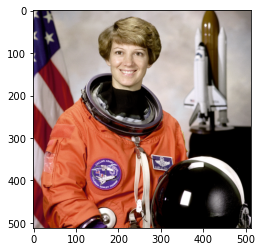

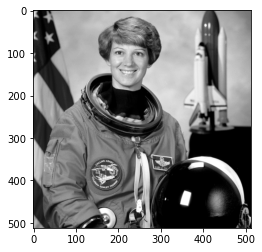

In [ ]:
# converting a rgb image to gray scale

from skimage.color import rgb2gray

img = data.astronaut()
plt.imshow(img)
plt.show()

img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.show()

(500, 500, 4)


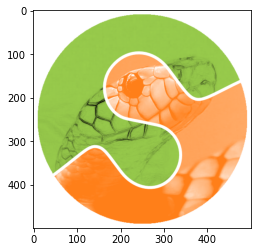

(500, 500, 3)


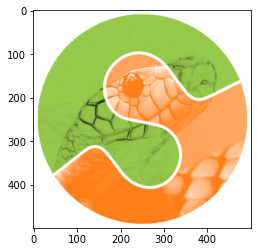

In [ ]:
# converting rgba to rgb

from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
print(img_rgba.shape)
plt.imshow(img_rgba)
plt.show()

img_rgb = rgba2rgb(img_rgba)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

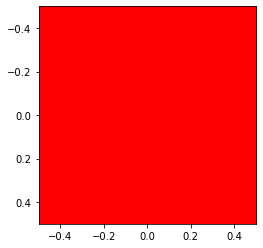

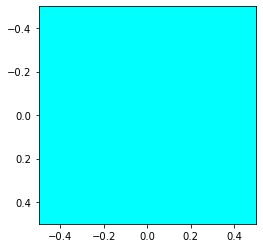

In [ ]:
# converting rgb to hsv

import numpy as np
from skimage.color import rgb2hsv

# create an array with bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
plt.imshow(red_pixel_rgb)
plt.show()

hsv = rgb2hsv(red_pixel_rgb)
plt.imshow(hsv)
plt.show()

**Exercise #09:**

*   Why do you think there are more than one color representation such as RGB, HSV?



**Solution**

*It is probably too difficult to represent all existing colors and intensities in real-life with just one model, so it is easier to complement them.*

...



---


**It has to be noted that this is not a complete tutorial covering the complete skimage aspects. This is provided as an introduction to skimage and its ease of use in image computations.**